# Counting Bacteria in Different Solution Project

## Download all images here

In [4]:
# download images for testing
!wget https://drive.google.com/uc?id=1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg -O final.zip
!unzip final.zip -d .

--2022-11-25 09:00:39--  https://drive.google.com/uc?id=1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg
Resolving drive.google.com (drive.google.com)... 142.251.2.138, 142.251.2.100, 142.251.2.101, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2arsjppps1ddb6c8qk1ae1ou5a0lnqsn/1669366800000/10800959494545164832/*/1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg?uuid=7e2dfbc1-fc34-4982-a579-1e1e0b225c30 [following]
--2022-11-25 09:00:40--  https://doc-0s-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2arsjppps1ddb6c8qk1ae1ou5a0lnqsn/1669366800000/10800959494545164832/*/1EeCSBNZS1z-xJCTxFnZbJkmB_Mo9Azkg?uuid=7e2dfbc1-fc34-4982-a579-1e1e0b225c30
Resolving doc-0s-2o-docs.googleusercontent.com (doc-0s-2o-docs.googleusercontent.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to doc-0s-2o-d

## Write your code in the area provided

In [5]:
# Final_1
# Make sure that you can run main() successfully without error before submission
# Do not change function name, return variables or input parameters (will be used for marking) 
# Do not remove provided code / comments in this cell
# Only write code in the area provided, see comments -> ####### write your code here #################
import numpy as np
import matplotlib.pyplot as plt
import cv2

####### import you library here only #################
from scipy.spatial import distance


# colors represents estimated contents - A, B and C, particles and beaker
colors = { 0: (255,255,0),   # "content_A"
           1: (0,255,255),   # "content_B"
           2: (255,0,255),   # "content_C"
           3: (81, 144, 0),  # "particles"
           4: (0, 0, 0)}     # "beaker"

def cal_content_proportion(image):
  # input - image: numpy array of an RGB image
  # output -  pA: (int) proportion of liquid content A (in percent)
  #           pB: (int) proportion of liquid content B (in percent)
  #           pC: (int) proportion of liquid content C (in percent)
  pA,pB,pC = 0,0,0

  ####### write your code here #################

  height,width,dim=image.shape #collect height and width from image
  first_sampling=image[:,width//4,:]
  second_sampling=image[:,width//2,:]
  third_sampling=image[:,3*width//4,:]
  
  count_A=0
  count_B=0
  count_C=0
  actual_begin_region_A=-1
  actual_begin_region_B=-1
  actual_begin_region_C=-1
  actual_end_region_A=-1
  actual_end_region_B=-1
  actual_end_region_C=-1
  

  first_result=find_region(first_sampling,height)
  second_result=find_region(second_sampling,height)
  third_result=find_region(third_sampling,height)
  actual_begin_region_A=min(first_result[0],second_result[0],second_result[0])
  actual_begin_region_B=min(first_result[1],second_result[1],third_result[1])
  actual_begin_region_C=min(first_result[2],second_result[2],third_result[2])
  actual_end_region_A=max(first_result[3],second_result[3],third_result[3])
  actual_end_region_B=max(first_result[4],second_result[4],third_result[4])
  actual_end_region_C=max(first_result[5],second_result[5],third_result[5])

  #print(first_result)
  #print(second_result)
  #print(third_result)

  count_A=actual_end_region_A-actual_begin_region_A
  count_B=actual_end_region_B-actual_begin_region_B
  count_C=actual_end_region_C-actual_begin_region_C
  #correct count A and B
  if(actual_end_region_A!=-1 and actual_begin_region_B!=-1):
    count_A+=(actual_begin_region_B-actual_end_region_A)/2
    count_B+=(actual_begin_region_B-actual_end_region_A)/2
  elif(actual_end_region_A!=-1 and actual_begin_region_C!=-1):
    count_A+=(actual_begin_region_C-actual_end_region_A)/2
    count_C+=(actual_begin_region_C-actual_end_region_A)/2
  #correct count B and C
  if(actual_end_region_B!=-1 and actual_begin_region_C!=-1):
    count_B+=(actual_begin_region_C-actual_end_region_B)/2
    count_C+=(actual_begin_region_C-actual_end_region_B)/2
  sum_count=count_A+count_B+count_C

  #print(sum_count)
  #print(actual_begin_region_A,actual_begin_region_B,actual_begin_region_C)
  #print(actual_end_region_A,actual_end_region_B,actual_end_region_C)
  #print(count_A,count_B,count_C)
  
  pA=100*count_A/sum_count
  pB=100*count_B/sum_count
  pC=100*count_C/sum_count
  
  
  return pA,pB,pC

def count_particles(image):
  # input - image: numpy array of an RGB image
  # output -  n_count: (int) total number of particles in the beaker 
  n_count = 0
  ####### write your code here #################
  img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  ret,thresh1 = cv2.threshold(img,108,255,cv2.THRESH_BINARY)

  ret,thresh2 = cv2.threshold(img,109,255,cv2.THRESH_BINARY_INV)

  #plt.imshow(thresh1)
  #plt.show()
  #plt.imshow(thresh2)
  #plt.show()

  #thresh1=thresh1^thresh2
  thresh1=cv2.bitwise_xor(thresh1, thresh2, mask=None)
  thresh1=cv2.bitwise_not(thresh1)
  #plt.imshow(thresh1)
  #plt.show()

  # You need to choose 4 or 8 for connectivity type
  connectivity = 4

  output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)
  # Get the results
  # The first cell is the number of labels
  num_labels = output[0]-1
  # The second cell is the label matrix
  labels = output[1]
  # The third cell is the stat matrix
  stats = output[2]
  # The fourth cell is the centroid matrix
  centroids = output[3]
  count=0
  if(num_labels>0):
    for i in range(1,output[0]):
      count+=stats[i][4]//425 
  #print(stats)

  #n_count=num_labels
  n_count=count
  return n_count


def count_particles_in_a_content(image):
  # input - image: numpy array of an RGB image
  # output -  n_count: total number of particles in the beaker 
  # output -  nA: (int) total number of particles in liquid content A 
  #           nB: (int) total number of particles in liquid content B 
  #           nC: (int) total number of particles in liquid content C 
  nA,nB,nC = 0,0,0
  ####### write your code here #################
  img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  
  ret,thresh1 = cv2.threshold(img,108,255,cv2.THRESH_BINARY)

  ret,thresh2 = cv2.threshold(img,109,255,cv2.THRESH_BINARY_INV)

  #plt.imshow(thresh1)
  #plt.show()
  #plt.imshow(thresh2)
  #plt.show()

  #thresh1=thresh1^thresh2
  thresh1=cv2.bitwise_xor(thresh1, thresh2, mask=None)
  thresh1=cv2.bitwise_not(thresh1)
  #plt.imshow(thresh1)
  #plt.show()

  # You need to choose 4 or 8 for connectivity type
  connectivity = 4

  output = cv2.connectedComponentsWithStats(thresh1, connectivity, cv2.CV_32S)
  # Get the results
  # The first cell is the number of labels
  num_labels = output[0]-1
  # The second cell is the label matrix
  labels = output[1]
  # The third cell is the stat matrix
  stats = output[2]
  # The fourth cell is the centroid matrix
  centroids = output[3]

  height,width,dim=image.shape #collect height and width from image
  first_sampling=image[:,width//4,:]
  second_sampling=image[:,width//2,:]
  third_sampling=image[:,3*width//4,:]
  first_result=find_region(first_sampling,height)
  second_result=find_region(second_sampling,height)
  third_result=find_region(third_sampling,height)
  actual_begin_region_A=min(first_result[0],second_result[0],second_result[0])
  actual_begin_region_B=min(first_result[1],second_result[1],third_result[1])
  actual_begin_region_C=min(first_result[2],second_result[2],third_result[2])
  actual_end_region_A=max(first_result[3],second_result[3],third_result[3])
  actual_end_region_B=max(first_result[4],second_result[4],third_result[4])
  actual_end_region_C=max(first_result[5],second_result[5],third_result[5])
  b1,b2,contain_a,contain_b,contain_c=find_boundary(actual_begin_region_A,actual_begin_region_B,actual_begin_region_C,actual_end_region_A,actual_end_region_B,actual_end_region_C)
  nA,nB,nC=count_in_region(b1,b2,contain_a,contain_b,contain_c,stats,centroids)
  return nA,nB,nC


####### write your own function here, if needed #################

def find_region(img_sampling,h):
    colors = { 0: (255,255,0),   # "content_A"
            1: (0,255,255),   # "content_B"
            2: (255,0,255),   # "content_C"
            3: (81, 144, 0),  # "particles"
            4: (0, 0, 0)}     # "beaker"
    begin_region_A=-1
    begin_region_B=-1
    begin_region_C=-1
    end_region_A=-1
    end_region_B=-1
    end_region_C=-1
    for i in range(0,h):
      #current_pixel=img_sampling[i]
      current_pixel=thresholding_color(img_sampling[i],np.array([colors[0],colors[1],colors[2],colors[3],colors[4]]))
      if(np.array_equal(current_pixel,colors[0])):
        if(begin_region_A==-1):
          begin_region_A=i
        end_region_A=i
      elif(np.array_equal(current_pixel,colors[1])):
        if(begin_region_B==-1):
          begin_region_B=i
        end_region_B=i
      elif(np.array_equal(current_pixel,colors[2])):
        if(begin_region_C==-1):
          begin_region_C=i
        end_region_C=i
    return begin_region_A,begin_region_B,begin_region_C,end_region_A,end_region_B,end_region_C
def find_boundary(begin_region_A,begin_region_B,begin_region_C,end_region_A,end_region_B,end_region_C):
  b1=-1
  b2=-1
  contain_a=0
  contain_b=0
  contain_c=0
  if(begin_region_A!=-1 and begin_region_B!=-1 and begin_region_C!=-1):
    b1=begin_region_B
    b2=begin_region_C
    contain_a=1
    contain_b=1
    contain_c=1
  elif(begin_region_A==-1 and begin_region_B!=-1 and begin_region_C!=-1):
    b2=begin_region_C
    contain_b=1
    contain_c=1
  elif(begin_region_A!=-1 and begin_region_B==-1 and begin_region_C!=-1):
    b1=begin_region_C
    b2=begin_region_C
    contain_a=1
    contain_c=1
  elif(begin_region_A!=-1 and begin_region_B!=-1 and begin_region_C==-1):
    b1=begin_region_B
    contain_a=1
    contain_b=1
  return b1,b2,contain_a,contain_b,contain_c
def thresholding_color(sampling,colors):
  value_a=distance.euclidean(sampling,colors[0])
  value_b=distance.euclidean(sampling,colors[1])
  value_c=distance.euclidean(sampling,colors[2])
  bac=distance.euclidean(sampling,colors[3])
  black=distance.euclidean(sampling,colors[4])
  
  if(min(value_a,value_b,value_c,bac,black)==value_a):
    return colors[0]
  elif(min(value_a,value_b,value_c,bac,black)==value_b):
    return colors[1]
  elif(min(value_a,value_b,value_c,bac,black)==value_c):
    return colors[2]
  elif(min(value_a,value_b,value_c,bac,black)==bac):
    return colors[3]
  else:
    return colors[4]

def count_in_region(b1,b2,contain_a,contain_b,contain_c,stats,centroids):
  nA=0
  nB=0
  nC=0
  for i in range(1,len(stats)):
    if(contain_a==1 and contain_b==1 and contain_c==1):
      if(centroids[i][1]<b1):
        nA+=stats[i][4]//425
      elif(centroids[i][1]>b1 and centroids[i][1]<b2):
        nB+=stats[i][4]//425
      else:
        nC+=stats[i][4]//425
    elif(contain_a!=1 and contain_b==1 and contain_c==1):
      if(centroids[i][1]<b2):
        nB+=stats[i][4]//425
      else:
        nC+=stats[i][4]//425
    elif(contain_a==1 and contain_b!=1 and contain_c==1):
      if(centroids[i][1]<b1):
        nA+=stats[i][4]//425
      else:
        nC+=stats[i][4]//425
    elif(contain_a==1 and contain_b==1 and contain_c!=1):
      if(centroids[i][1]<b1):
        nA+=stats[i][4]//425
      else:
        nB+=stats[i][4]//425
  return nA,nB,nC
###############################################################################
def main():
  # main() is provided for testing your code
  # Make sure that you can run main() successfully without error before submission
  # Do not change function name, return variables or input parameters (will be used for marking) 
  
  # read an image and convert it to RGB
  image = cv2.imread("04_02.png")
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.imshow(image)
  plt.show()

  # calculate content proportion of liquid content A, B and C, respectively
  pA,pB,pC = cal_content_proportion(image)
  print('Proportion: {}%, {}%, {}% '.format(pA,pB,pC))

  # count number of particles in content A, B and C, respectively
  nA,nB,nC = count_particles_in_a_content(image)
  print('Number of Particles in each content: {}, {}, {} '.format(nA,nB,nC))

  # count total number of particles
  n_count = count_particles(image)
  print('Total number of particles:',n_count)


## Test your code here

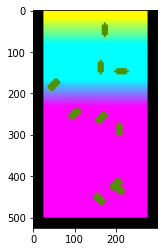

Proportion: 9.919839679358718%, 30.060120240480963%, 60.02004008016032% 
Number of Particles in each content: 1, 3, 6 
Total number of particles: 10


In [6]:
# Test your code here
main()

# Problem 2

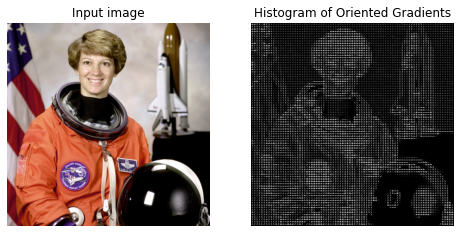

In [8]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure

image = data.astronaut()

fd, hog_image = hog(image, orientations=3, pixels_per_cell=(6, 6), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()
